#Analyzing Stock Data

In [1]:
!pip install yfinance --upgrade --no-cache-dir
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.32
    Uninstalling yfinance-0.2.32:
      Successfully uninstalled yfinance-0.2.32
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Set the ticker symbol and define the date range
ticker = "AAPL"
start_date = "2021-11-01"
end_date = "2023-11-01"

# Download historical data as a Pandas DataFrame
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Access the Date column
dates = stock_data.index

[*********************100%%**********************]  1 of 1 completed


After importing all of our necessary packages, we decide our stock prices are going to be analyzed from November 1st 2021, to November 1st 2023

#Data Preprocessing

In [3]:
# Display the first few rows of the data
stock_data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,148.990005,149.699997,147.800003,148.960007,147.062622,74588300
2021-11-02,148.660004,151.570007,148.649994,150.020004,148.109116,69122000
2021-11-03,150.389999,151.970001,149.820007,151.490005,149.560394,54511500
2021-11-04,151.580002,152.429993,150.639999,150.960007,149.037140,60394600
2021-11-05,151.889999,152.199997,150.059998,151.279999,149.571045,65463900
2021-11-08,151.410004,151.570007,150.160004,150.440002,148.740540,55020900
2021-11-09,150.199997,151.429993,150.059998,150.809998,149.106354,56787900
2021-11-10,150.020004,150.130005,147.850006,147.919998,146.248978,65187100
2021-11-11,148.960007,149.429993,147.679993,147.869995,146.199554,41000000


In [4]:
#Check the shape of the dataframe (Number of Rows and Columns)
stock_data.shape

(503, 6)

Here we can see that our data has 503 rows and 6 columns, the date column is not counted here as it is an index.

In [5]:
#Check for Missing Values
stock_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

We check for missing values and we do not have any, which is great

In [6]:
#Describe our data
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,161.390974,163.320895,159.668728,161.568072,160.544131,7.722305e+07
std,16.133702,15.920820,16.285485,16.088470,16.175545,2.694175e+07
min,126.010002,127.769997,124.169998,125.019997,124.325089,3.145820e+07
25%,148.760002,150.529999,147.264999,148.935005,147.961052,5.688205e+07
50%,161.839996,164.520004,159.779999,162.509995,161.245193,7.137960e+07
75%,173.769997,175.325005,172.114998,174.205002,172.955154,9.007030e+07
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.954327e+08


Here we can find descriptive statistics like minimun, maximum, mean and count. Here we can also add the min and max for our dates, which is 2021-11-01 for our min/start date; and 2023-11-01 for our max/end date. Deeper analysis is conducted on the bivariate analysis on the min and max of other columns.

In [7]:
#Check our data types
stock_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Here we can see our variable types, this looks good as all of our values except for Volume have decimals, so a float for them and int for Volume seems like an accurate choice. Volume is not a float because the number of stocks traded needs to be a whole number.

#Univariate Analysis

After conducting a Univariate Analysis on all of our variables, we can see the following results.

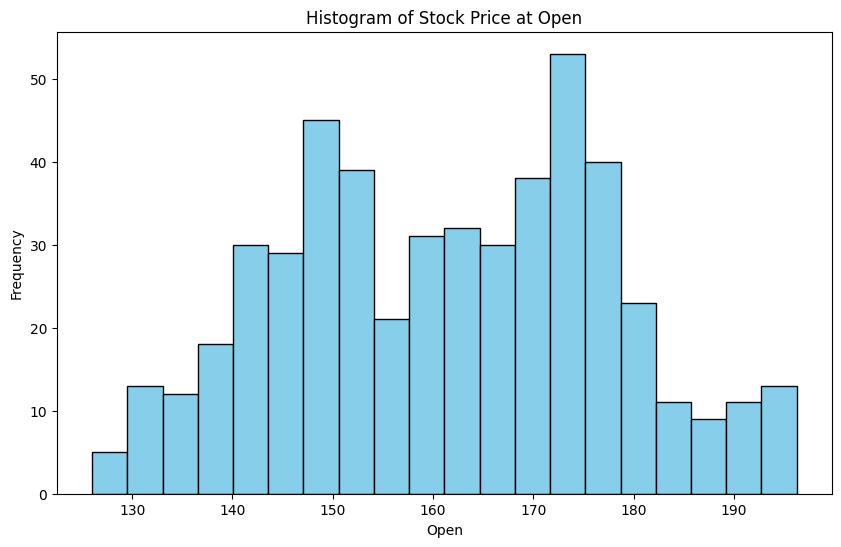

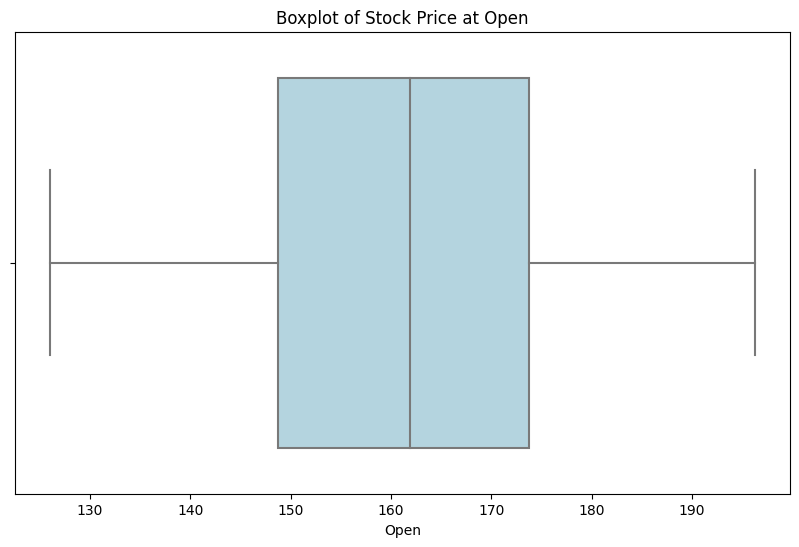

In [8]:
# Plotting Histogram
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Open'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Open')
plt.ylabel('Frequency')
plt.title('Histogram of Stock Price at Open')
plt.show()

# Plotting Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock_data['Open'], color='lightblue')
plt.xlabel('Open')
plt.title('Boxplot of Stock Price at Open')
plt.show()

For the Open Price, we can see a generally normal distribution with no outliers, our mode is around 173 and our mean around 163.

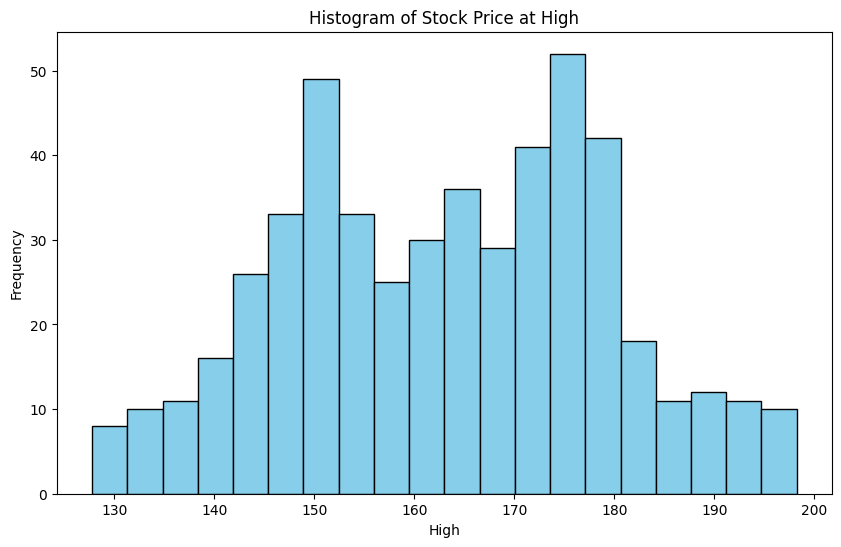

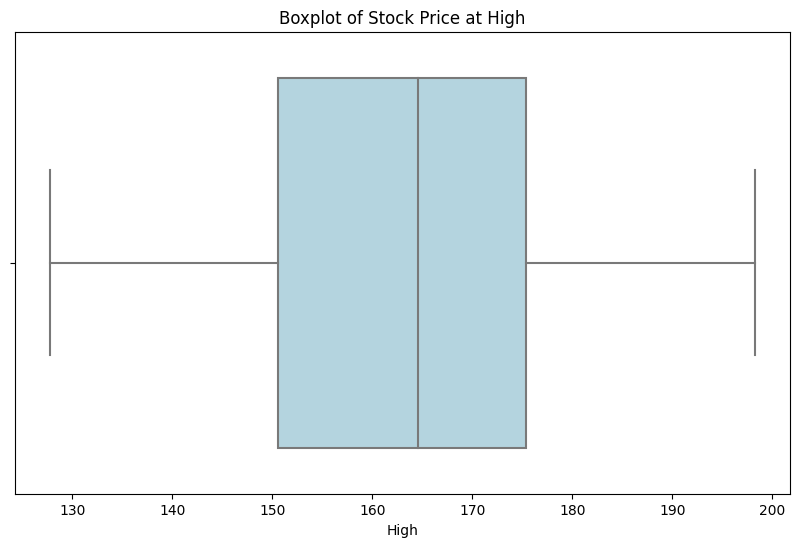

In [9]:
# Plotting Histogram
plt.figure(figsize=(10, 6))
plt.hist(stock_data['High'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('High')
plt.ylabel('Frequency')
plt.title('Histogram of Stock Price at High')
plt.show()

# Plotting Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock_data['High'], color='lightblue')
plt.xlabel('High')
plt.title('Boxplot of Stock Price at High')
plt.show()

For the High Price, we can see a generally normal distribution with no outliers, our mode is around 175 and our mean around 165.

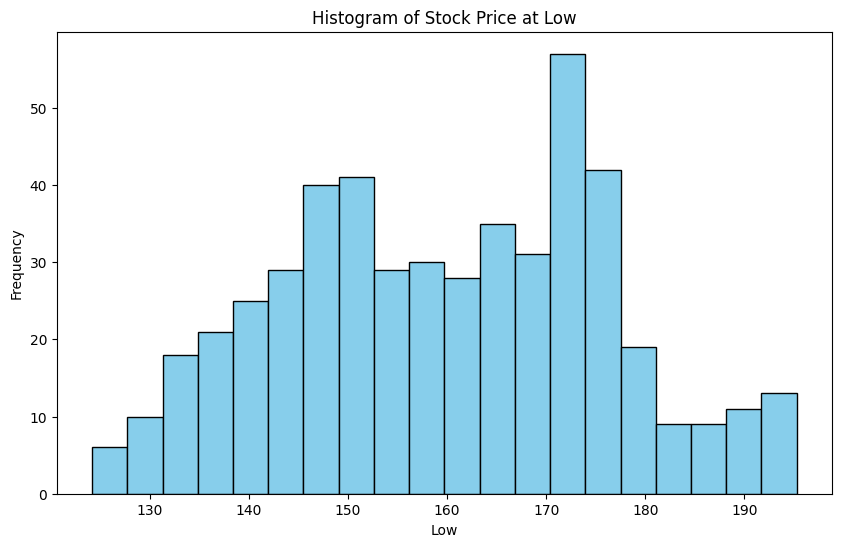

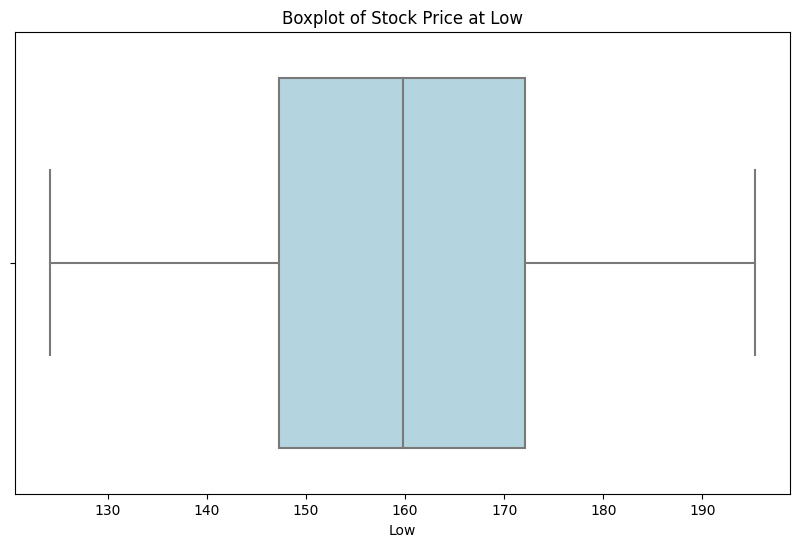

In [10]:
# Plotting Histogram
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Low'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Low')
plt.ylabel('Frequency')
plt.title('Histogram of Stock Price at Low')
plt.show()

# Plotting Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock_data['Low'], color='lightblue')
plt.xlabel('Low')
plt.title('Boxplot of Stock Price at Low')
plt.show()

For the Low Price, we can see a generally normal distribution with no outliers, our mode is around 172 and our mean around 160.

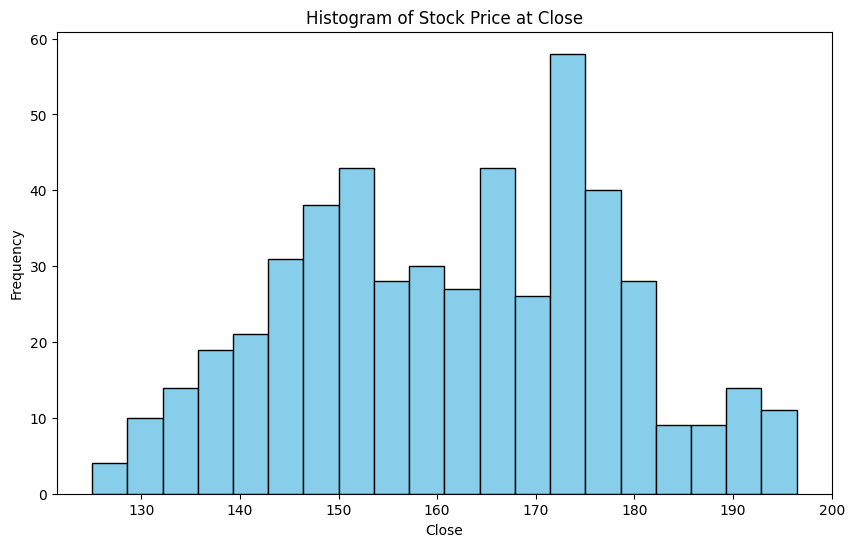

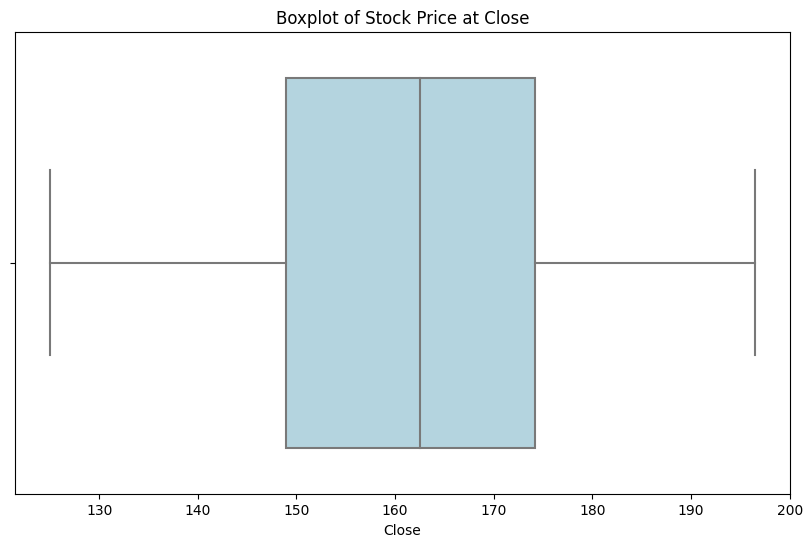

In [11]:
# Plotting Histogram
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Close'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.title('Histogram of Stock Price at Close')
plt.show()

# Plotting Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock_data['Close'], color='lightblue')
plt.xlabel('Close')
plt.title('Boxplot of Stock Price at Close')
plt.show()

For the Close Price, we can see a generally normal distribution with no outliers, our mode is around 172 and our mean around 163.

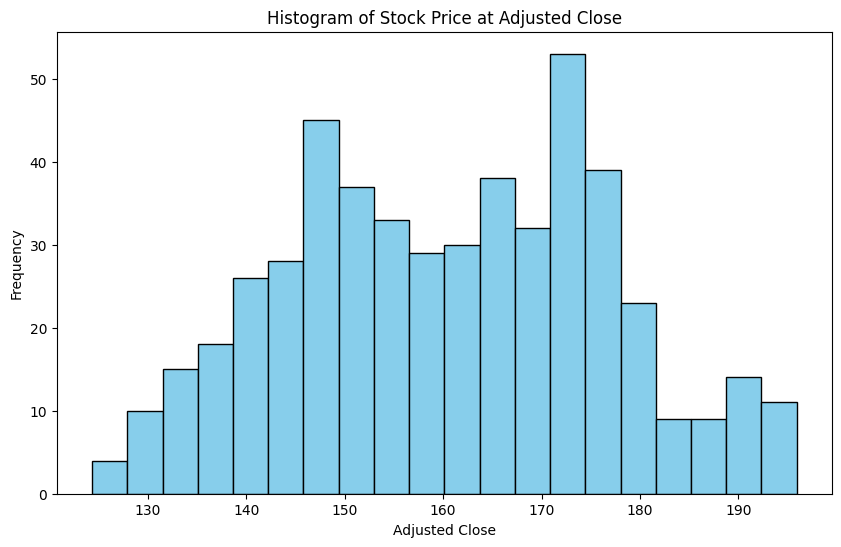

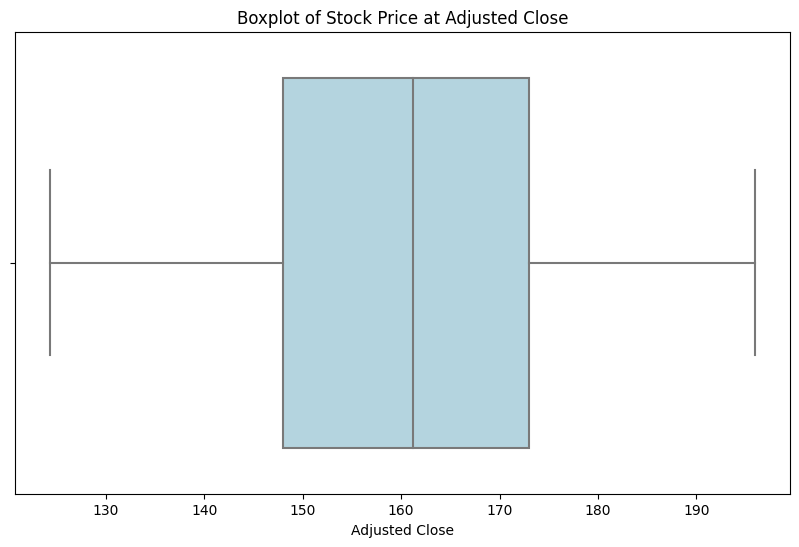

In [12]:
# Plotting Histogram
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Adj Close'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Adjusted Close')
plt.ylabel('Frequency')
plt.title('Histogram of Stock Price at Adjusted Close')
plt.show()

# Plotting Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock_data['Adj Close'], color='lightblue')
plt.xlabel('Adjusted Close')
plt.title('Boxplot of Stock Price at Adjusted Close')
plt.show()

For the Adjusted Close Price, we can see a generally normal distribution with no outliers, our mode is around 172 and our mean around 162.

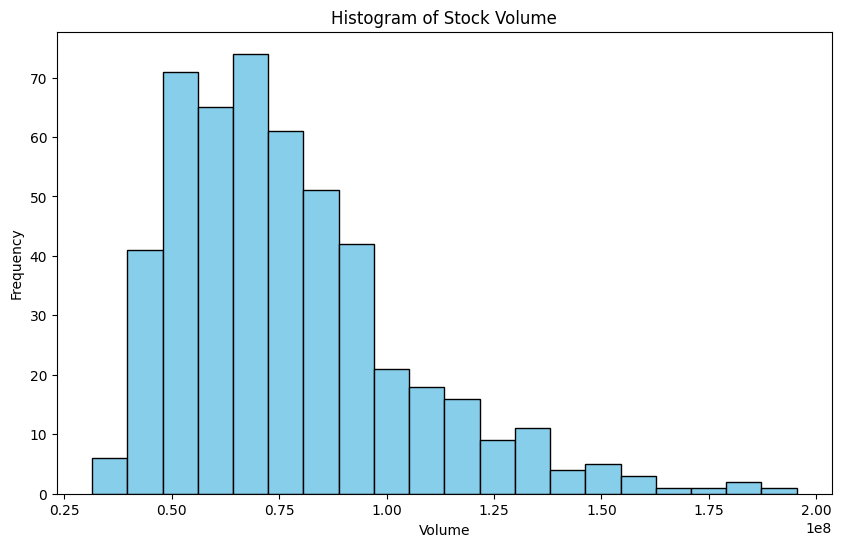

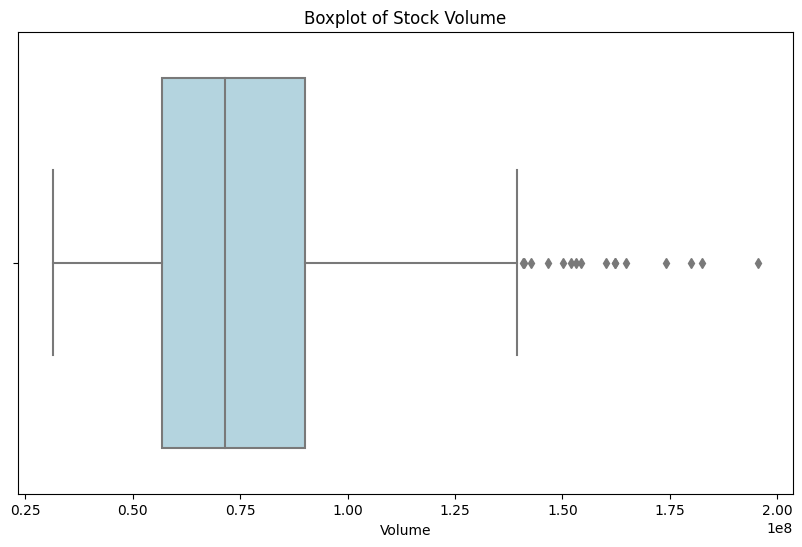

In [13]:
# Plotting Histogram
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Volume'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Histogram of Stock Volume')
plt.show()

# Plotting Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock_data['Volume'], color='lightblue')
plt.xlabel('Volume')
plt.title('Boxplot of Stock Volume')
plt.show()

For the Volume, we can see a right skeewed distribution with a lot of outliers (about 13), our mode is around 70 million and our mean around the same (70 million).

As a general analysis of all the data, we can see that the price of the stock is generally on the same range no matter the category, this tells us that the stock is not very volatile and it would be secure to invest on it. This can also be backed up by the volume on what the stock is being traded, being in the high millions per day.

#Bivariate Analysis

In this section, we conducted a bivariate analysis of all of our variables singled out and plotted by date.

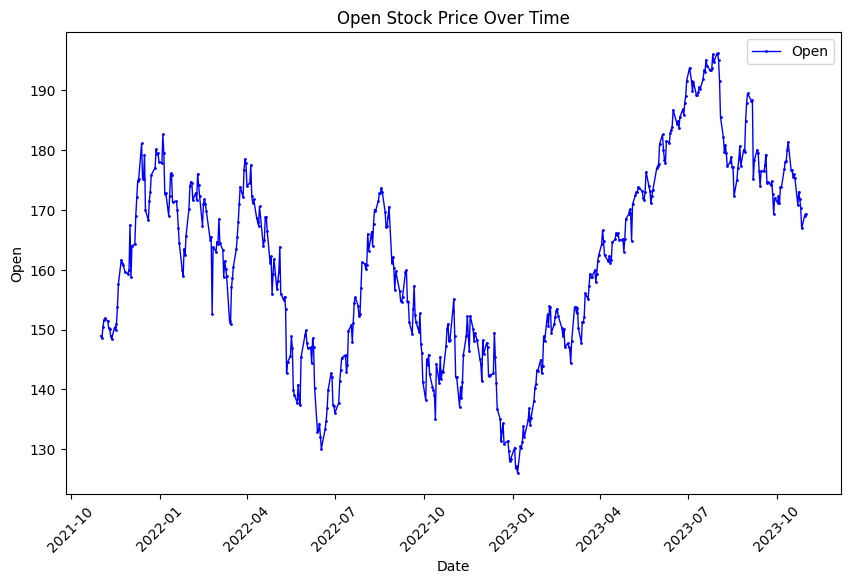

In [14]:
# Plotting with a less bold style
plt.figure(figsize=(10, 6))

# Adjust line properties for a less bold style
plt.plot(dates, stock_data['Open'], marker='o', linestyle='-', color='b', label='Open', linewidth=1, markersize=1)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Open Stock Price Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

For the Open Stock price, we can see a pattern that is going to be repeated for all of the other prices. Same as on our univariate analysis, our values are pretty similar and all have a general upwards trend. In this case, our minimun price was reached in January 2023, with a price of US\$126.01, and our maximum price was reached on July 2023, with a price of US\$196.24. More information about why this happened at the end of the section.

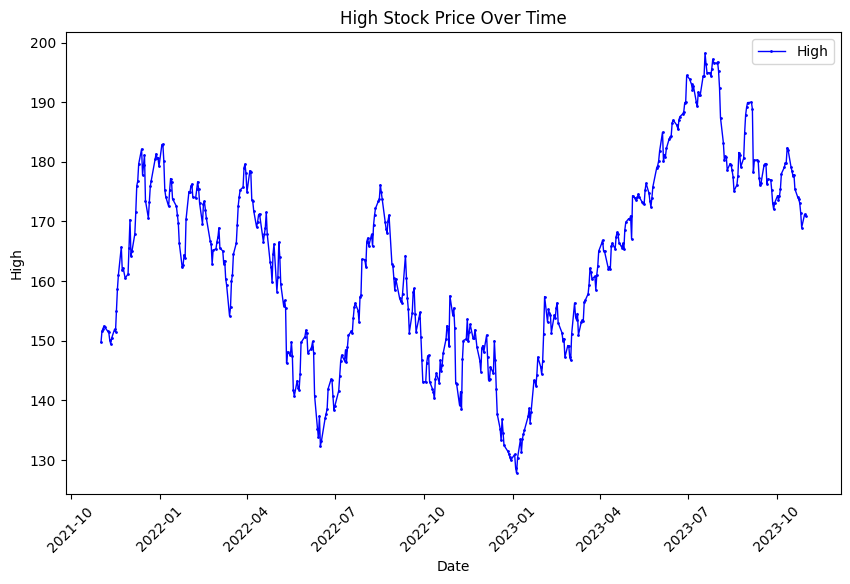

In [15]:
# Plotting with a less bold style
plt.figure(figsize=(10, 6))

# Adjust line properties for a less bold style
plt.plot(dates, stock_data['High'], marker='o', linestyle='-', color='b', label='High', linewidth=1, markersize=1)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('High Stock Price Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

As we can see here, the graph is pretty similar as we mentioned before. In this case the min price is US\$127.77, and the max price is US\$198.23. The prices were achieved on the same dates for every variable, so we won't mention them until the end as previously said. Also again the trend is an upwards trend, as we will keep seeing.

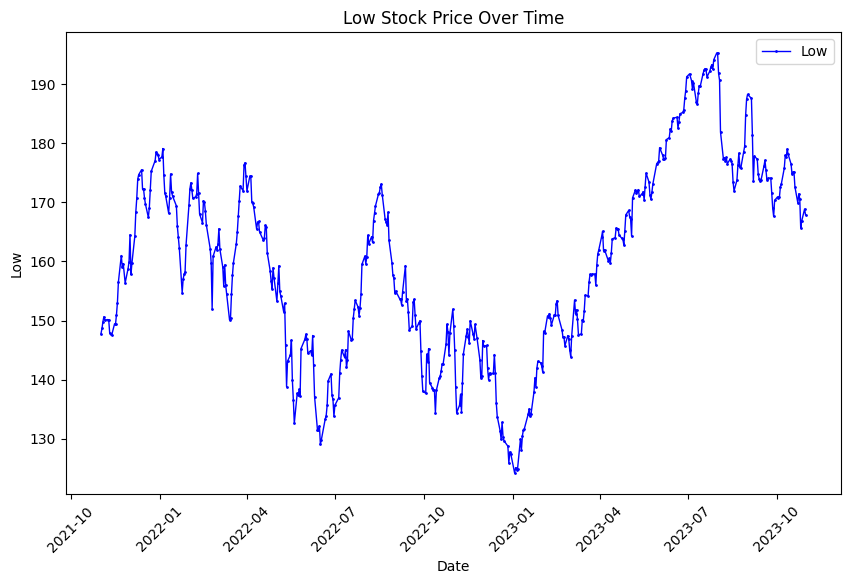

In [16]:
# Plotting with a less bold style
plt.figure(figsize=(10, 6))

# Adjust line properties for a less bold style
plt.plot(dates, stock_data['Low'], marker='o', linestyle='-', color='b', label='Low', linewidth=1, markersize=1)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Low')
plt.title('Low Stock Price Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

In this case, the min price was US\$124.17 and the max was US\$195.28, again we see an upwards trend.

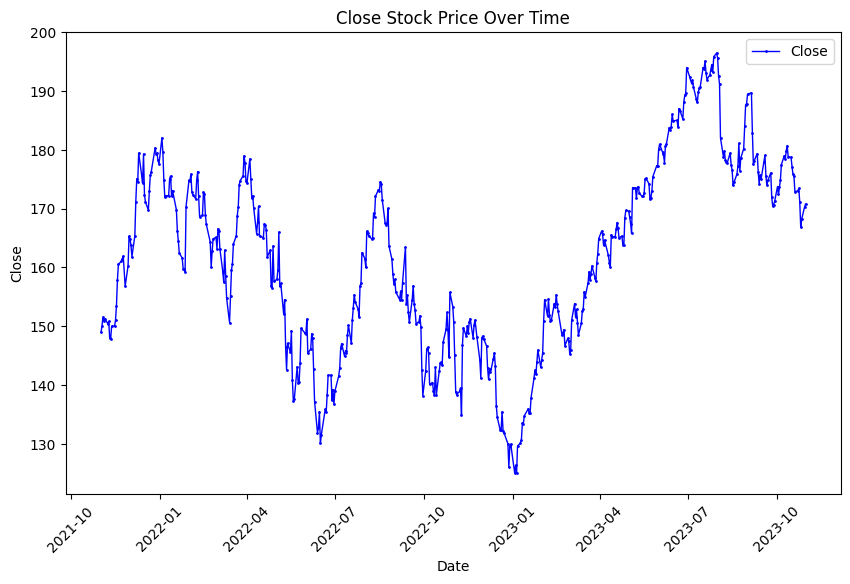

In [17]:
# Plotting with a less bold style
plt.figure(figsize=(10, 6))

# Adjust line properties for a less bold style
plt.plot(dates, stock_data['Close'], marker='o', linestyle='-', color='b', label='Close', linewidth=1, markersize=1)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Close Stock Price Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

Here the min price was US\$125.02 and the max was US\$196.45 with an upwards trend.

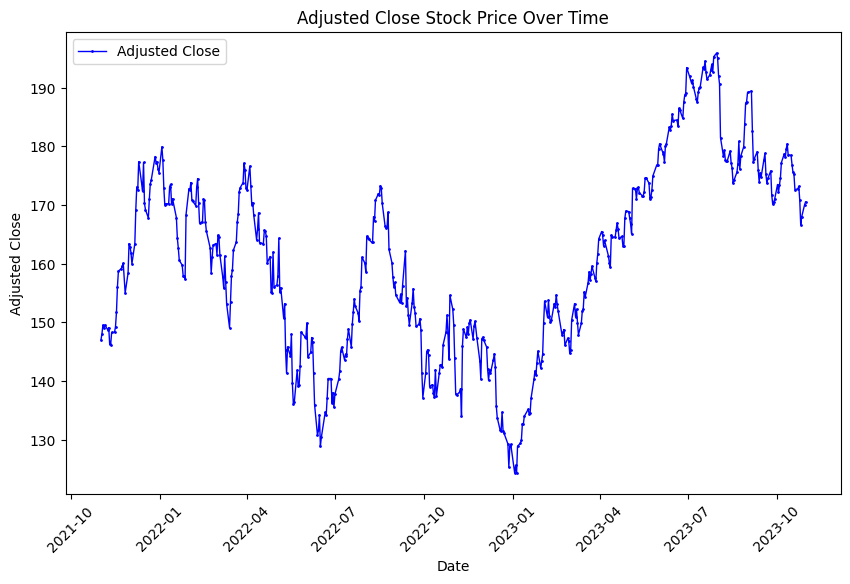

In [18]:
# Plotting with a less bold style
plt.figure(figsize=(10, 6))

# Adjust line properties for a less bold style
plt.plot(dates, stock_data['Adj Close'], marker='o', linestyle='-', color='b', label='Adjusted Close', linewidth=1, markersize=1)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.title('Adjusted Close Stock Price Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

For the Adjusted Close, we had a min price of US\$124.33 and a max of US\$195.93 with the same upwards trend.

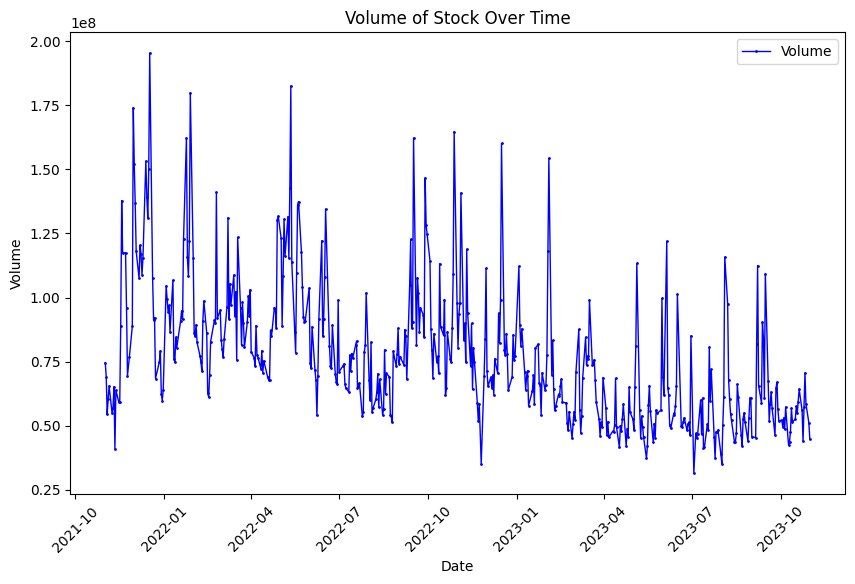

In [19]:
# Plotting with a less bold style
plt.figure(figsize=(10, 6))

# Adjust line properties for a less bold style
plt.plot(dates, stock_data['Volume'], marker='o', linestyle='-', color='b', label='Volume', linewidth=1, markersize=1)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume of Stock Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

For the volume, we can see that the days where the highes volumes were reached were the same days that we had a big change in the price of the stock. What is more interesting to see is the decrease in general volume from the year 2021 to 2023, as we can clearly see a downward trend. The min volume was achieved at the end of November and start of December 2022, with a volume of around 31 Million. The max was achieved on January 2021 with a volume of around 195 Million.

When looking at the price of the stock, we can see that the lowest value was reached on January of 2023, this was caused by BNP Paribas Exane. As its first stock action of the new year in 2023, BNP downgraded Apple stock from outperform to neutral, which caused the big dump on the stock, knocking the tech titan below $2 trillion in market capitalization for the first time since 2021.

In terms of the max price reached on July and August of 2023, this can be related to various aspects, mainly the announcement of Apple Vision Pro during WWDC in early June. This can also be attributed to the proximity date to the announcement of the new iPhone in September, or the launch of their new Macs at the end of June.

We can see the stock peak multiple times during the months of July and September each year, which has to do again with WWDC and the announcement of the new iPhones each year.

#Multivariate Analysis

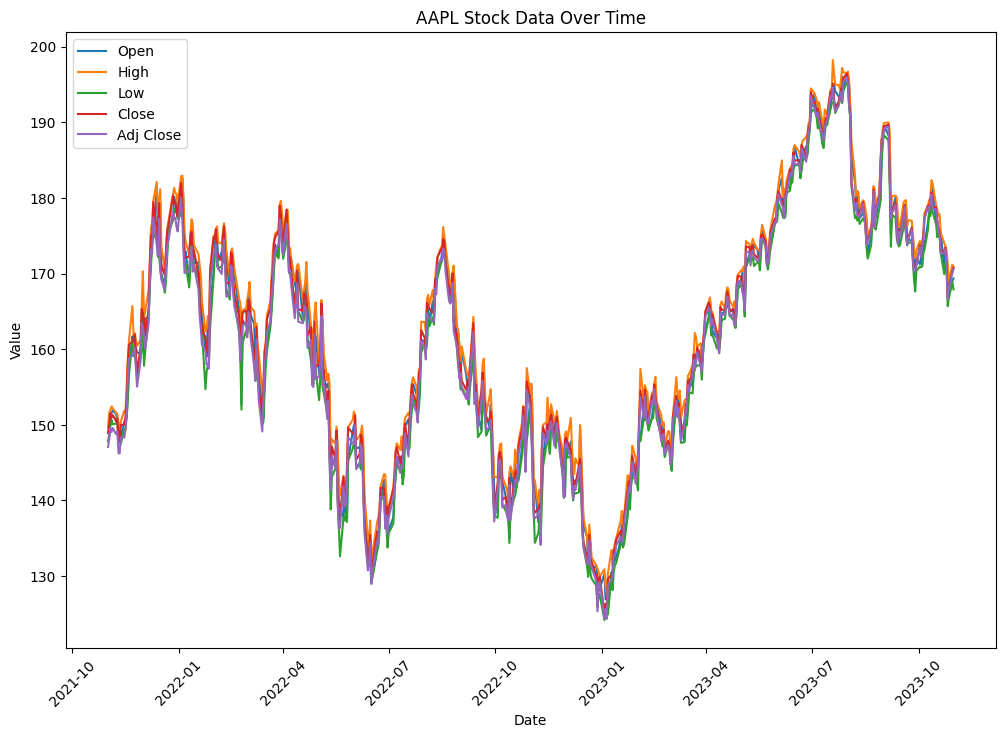

In [20]:
#Create a dataset without the volume column
stock_data_wv = stock_data.drop(columns=['Volume'])

# Plot line chart for each variable
plt.figure(figsize=(12, 8))

for column in stock_data_wv.columns:
    plt.plot(stock_data_wv.index, stock_data_wv[column], label=column)

plt.title(f'{ticker} Stock Data Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

When looking at all our variables together (excluiding volume) plotted by date on a graph, we can confirm what is mentioned before in our bivariate analysis, which is that all of our prices have very similar trends and movements.

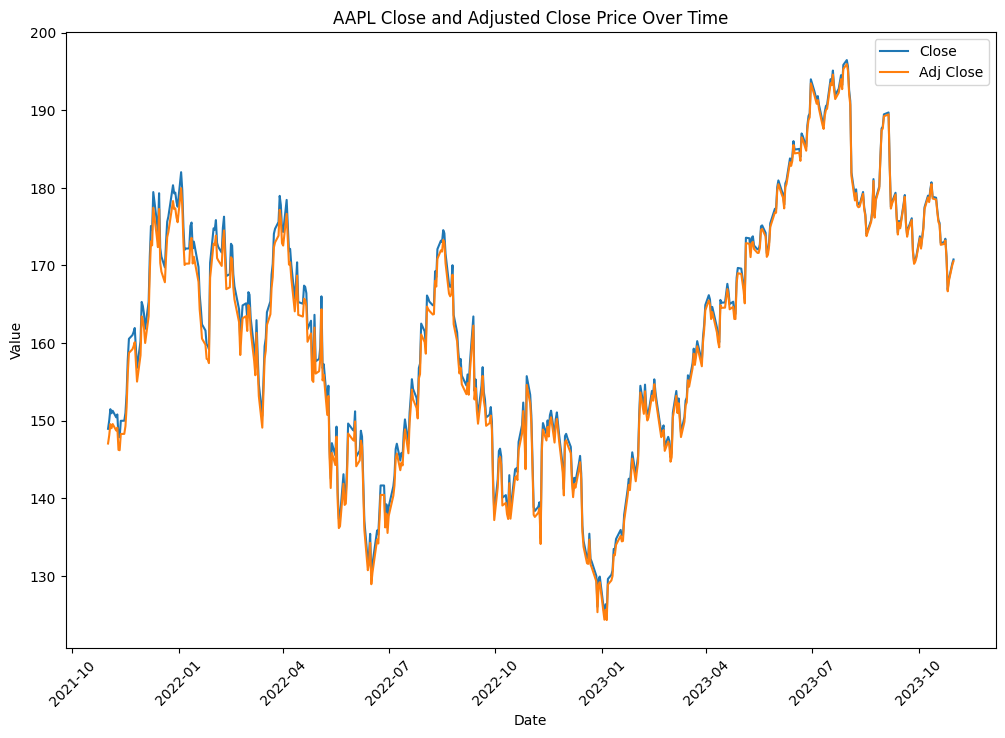

In [21]:
#Create a datset with only the Close and Adjusted Close columns
stock_data_cc = stock_data[['Close','Adj Close']]

# Plot line chart for each variable
plt.figure(figsize=(12, 8))

for column in stock_data_cc.columns:
    plt.plot(stock_data_cc.index, stock_data_cc[column], label=column)

plt.title(f'{ticker} Close and Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

Adjusted Close Price accounts for corporate actions such as dividends, stock splits, etc., and provides a more accurate reflection of the stock's value. If we plot it against the actual Close Price we can see that they are pretty much the same.

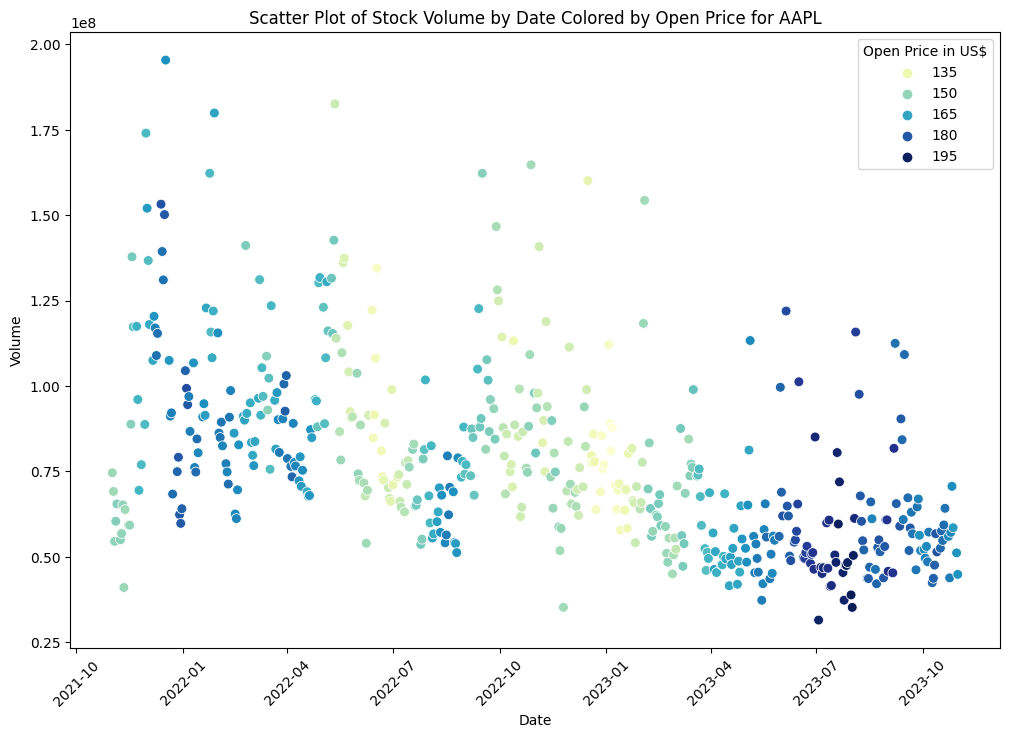

In [22]:
# Plot scatter plot of Volume by Date colored by Open
plt.figure(figsize=(12, 8))

sns.scatterplot(x=stock_data.index, y=stock_data['Volume'], hue=stock_data['Open'], palette='YlGnBu', s=50)

plt.title(f'Scatter Plot of Stock Volume by Date Colored by Open Price for {ticker}')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(title='Open Price in US$', loc='upper right')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

If we plot the volume of the stock by date colored by the opening price, we can see that there is no relation between the price of the stock and the volume of the trades. The relation comes between the volume and certain dates, explained in the bivariate section.

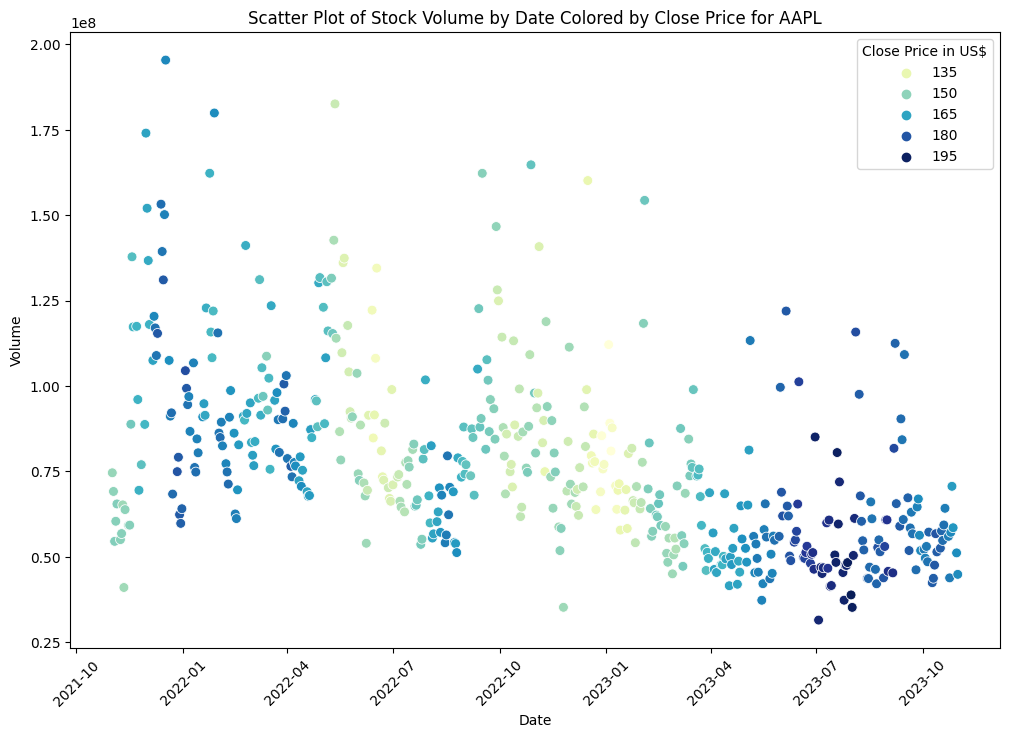

In [23]:
# Plot scatter plot of Volume by Date colored by Open
plt.figure(figsize=(12, 8))

sns.scatterplot(x=stock_data.index, y=stock_data['Volume'], hue=stock_data['Close'], palette='YlGnBu', s=50)

plt.title(f'Scatter Plot of Stock Volume by Date Colored by Close Price for {ticker}')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(title='Close Price in US$', loc='upper right')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

Here we can see a repeat of the analysis above, this time colored by the close price. Again, the relation comes between Volume and Date.

#ARIMA Model

In [24]:
# Perform auto_arima
model = auto_arima(stock_data['Adj Close'], suppress_warnings=True, seasonal=False)

# Print the best model parameters
print("Best ARIMA Model Parameters:", model.get_params())

Best ARIMA Model Parameters: {'maxiter': 50, 'method': 'lbfgs', 'order': (1, 1, 1), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (0, 0, 0, 0), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': False}


For this part, an Auto ARIMA model is performed in order to determine the best values for p,d,q. After conducting the model, our best values for the Adjusted Close variable are 1,1,1 for p,d,q respectively.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

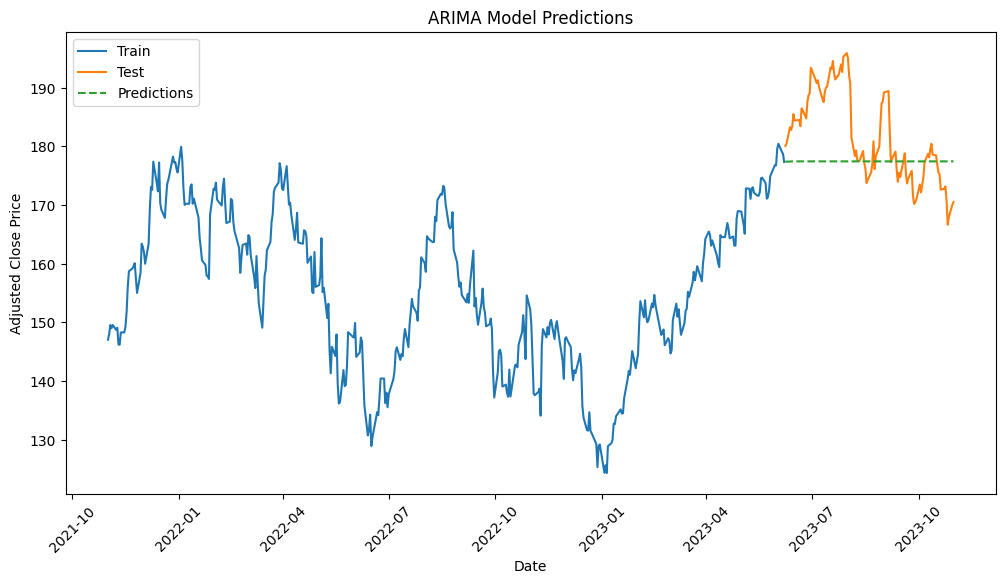

In [25]:
# Train-test split
train_size = int(len(stock_data) * 0.8)
train, test = stock_data[:train_size], stock_data[train_size:]

# Build and train an ARIMA model
order = (1, 1, 1)  # Adjust order based on data characteristics
model = ARIMA(train['Adj Close'], order=order)
fit_model = model.fit()

# Make predictions
predictions = fit_model.forecast(steps=len(test))

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(train['Adj Close'], label='Train')
plt.plot(test['Adj Close'], label='Test')
plt.plot(test.index, predictions, label='Predictions', linestyle='dashed')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

In [26]:
# Evaluate the model
mae = mean_absolute_error(test['Adj Close'], predictions)
mse = mean_squared_error(test['Adj Close'], predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test['Adj Close'], predictions)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 6.71
Mean Squared Error (MSE): 74.06
Root Mean Squared Error (RMSE): 8.61
R-squared (R2): -0.28


##Mean Absolute Error (MAE):
A MAE of 6.71 means that, on average, the model's predictions are off by approximately 6.71 units, in this case US\$6.71 off.

##Mean Squared Error (MSE):
MSE is similar to MAE but takes the average of the squared differences between predicted and actual values. Squaring the differences emphasizes larger errors more than MAE does.
A MSE of 74.06 means that, on average, the squared differences between our predicted and actual values are US\$74.06.

##Root Mean Squared Error (RMSE):
RMSE is the square root of MSE. It is another measure of the average magnitude of the errors, providing a more interpretable value in the same unit as the target variable.
An RMSE of 8.61 means that, on average, the model's predictions have an error of approximately US\$8.61.

##R-squared (R2):
An R-squared of -0.28 suggests that the model does not explain much of the variability in the data and may perform worse than a simple mean-based model, this does make sense though as this is real life data from stocks, which are volatile just from the sense that they are stocks.

#Final Remarks and Conclusion
We can see some interesting insights from the different analysis conducted from this data. It is impresive how stocks behave depending on the performance of a company and real life situations, as we could see here. For me it was also very interesting to see how the Israel and Hamas war hasn't seem to affect Apple for the time being, we'll have to see in the future though, as they have some factories and testing facilities there.

In terms of the model, we can conclude that an ARIMA is not the best in order to analyze stock prices. This is mainly because there is no seasonality or cyclical variation as we could see in other datasets that are not related to stocks. If we wanted to analyze this type of data we should use models like RNNs (Recurrent Neural Networks) or LSTMs (Long Short-Term Memory) that are more complex but could offer better results.